# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

## Load data

First, we are going to load our same prepared data from week 2 where everything has been converted to numbers. Many autoML packages can handle non-numeric data (they usually convert it to numeric with various methods).

In [26]:
import pandas as pd

df = pd.read_csv(r"/Users/abhilashreddy/Desktop/weeek 5/churn_data 1.csv",index_col='customerID' )
df 

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No


# AutoML with pycaret
Our next step is to use pycart for autoML. We will need to install the Python package with conda or pip: `pip install pycaret`.

In [2]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [27]:
from pycaret.classification import *

Next, we can setup our autoML:

In [28]:
automl = setup(df, target='Churn')

,Description,Value
0,Session id,3611
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 7)"
5,Transformed data shape,"(7043, 12)"
6,Transformed train set shape,"(4930, 12)"
7,Transformed test set shape,"(2113, 12)"
8,Ordinal features,1
9,Numeric features,3


In the above pre processing is true where that datatype conversion from string to numeric by default data type is binary

Next up, we simply run the autoML to find the best model:

In [29]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7970,0.8380,0.7970,0.7878,0.7901,0.4473,0.4515,0.7780
ada,Ada Boost Classifier,0.7949,0.8396,0.7949,0.7848,0.7870,0.4377,0.4428,0.0990
ridge,Ridge Classifier,0.7939,0.0000,0.7939,0.7813,0.7818,0.4185,0.4286,0.0370
lda,Linear Discriminant Analysis,0.7915,0.8284,0.7915,0.7829,0.7854,0.4368,0.4399,0.0410
gbc,Gradient Boosting Classifier,0.7913,0.8427,0.7913,0.7812,0.7830,0.4273,0.4330,0.1570
lightgbm,Light Gradient Boosting Machine,0.7862,0.8345,0.7862,0.7776,0.7802,0.4235,0.4265,0.6150
rf,Random Forest Classifier,0.7779,0.8033,0.7779,0.7689,0.7720,0.4027,0.4050,0.1640
knn,K Neighbors Classifier,0.7726,0.7533,0.7726,0.7596,0.7628,0.3725,0.3779,0.0550
et,Extra Trees Classifier,0.7637,0.7778,0.7637,0.7570,0.7595,0.3740,0.3753,0.1530
dummy,Dummy Classifier,0.7347,0.5000,0.7347,0.5398,0.6223,0.0000,0.0000,0.0390


From the comperssions the best sutable modele is logestic regression for this dataset

In [30]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3611, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
df.iloc[-2:-1]

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.4,306.6,Yes


We are selecting the last row, but using the indexing `[-2:-1]` to make it a 2D array instead of 1D (which throws an error). Try running `df.iloc[-1].shape` and `df.iloc[-2:-1].shape` to see how they differ.

However, this only works if we set `preprocess=False` in our setup function. Otherwise the order of features may be different

A more robust way (in case we are using preprocessing with autoML) is to use pycaret's predict_model function:

In [32]:
predict_model(best_model, df.iloc[-2:-1])


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.400002,306.600006,Yes,No,0.5077


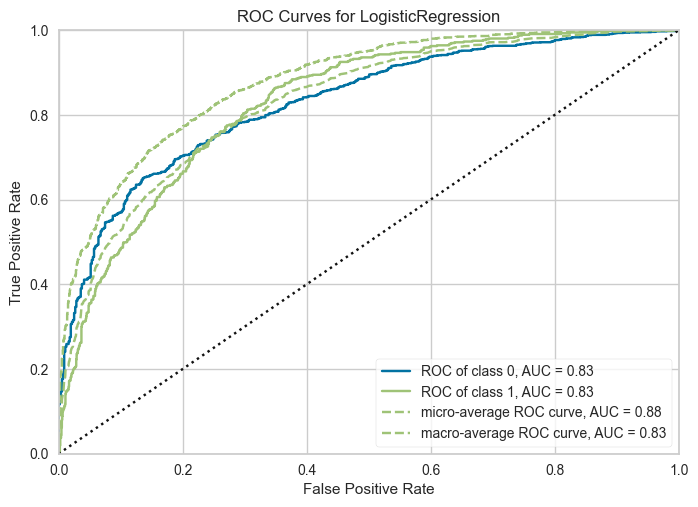

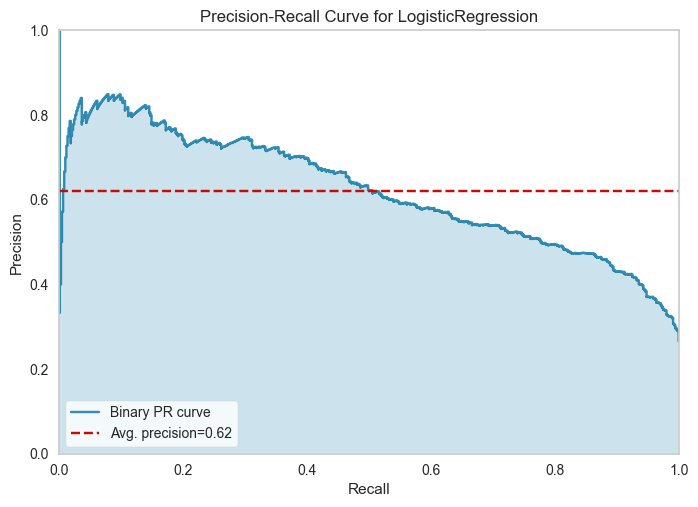

In [68]:
# Plot ROC-AUC curve
plot_model(best_model, plot='auc')

# Plot Precision-Recall curve
plot_model(best_model, plot='pr')


In the above above graph, the precision is maxed slight above 0.8 when recall value is between 0 to 0.2, in the second graph we can see precision is 0.6 is minimum at recall at 0.5.

## Saving and loading our model

Next, we want to save our trained model so we can use it in a Python file later. pycaret has a handy function for this, which saves the model as a pickle file:

In [33]:
save_model(best_model, 'lr')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'MonthlyCharges',
                                              'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                 

we have recived the best model and implemented as to my system

In [34]:
import pickle
with open('lr.pkl', 'wb') as f:
    pickle.dump(best_model, f)

Using the built-in open function, we first open a file called LDA_model.pk for writing ('w'), and then we open it in a binary format ('b'). The file object is saved in the variable f. After we end the with statement, the with statement automatically closes the file; if not, we should use the function close from the file object f. Next, pickle is used to save our data in the file. We could put it back in.

In [35]:
with open('lr.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

It loads almost exactly the same, with the exception that pickle's load function is used and `rb} is used to "read binary".


In [37]:
loaded_lr = load_model('lr')

Transformation Pipeline and Model Successfully Loaded


In [38]:
new_data=df.iloc[-2:-1]

In [39]:
predict_model(loaded_lr, new_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.400002,306.600006,Yes,No,0.5077


# Making a Python module to make predictions

In [69]:
from IPython.display import Code

Code( "/Users/abhilashreddy/Desktop/weeek 5/prediction_churn_data.py"
)

import pandas as pd
from pycaret.classification import predict_model, load_model

def load_data(filepath):
    df = pd.read_csv(filepath)
    return df


def make_predictions(df):
    model = load_model('lr')
   
    predictions = predict_model(model, data=df)
    
    predictions.rename({'prediction_label':'Churn_prediction'},axis=1,inplace=True)
    predictions['Churn_prediction'].replace({'Yes':1,'No':0},inplace=True)
    
    
    return predictions['Churn_prediction']

if __name__ == "__main__":
    df = load_data("/Users/abhilashreddy/Desktop/weeek 5/new_churn_data.csv")
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

We can test out running the file with the Jupyter "magic" command %run:



In [70]:
%run "/Users/abhilashreddy/Desktop/weeek 5/prediction_churn_data.py"

Transformation Pipeline and Model Successfully Loaded


predictions:
0    1
1    1
2    0
3    1
4    1
Name: Churn_prediction, dtype: int64


<Figure size 800x550 with 0 Axes>

After making modifications to the file while we are creating it, we can repeatedly run the line mentioned above. The actual results are 1, 1,0, 1, 1, indicating that our model is functional but not flawless. In the updated data, there is one false positive. It is a little random, though, because this new data was synthesized using previously collected data. 

#Summary

The first stage involved loading data from the previous week and using an AutoML framework to effectively handle non-numeric input for machine learning. The selected target variable was "Churn," and following AutoML analysis, the most accurate model found was "Logistic Regression" with an accuracy rate of 79%.

Using the plot_model function and the input plot='auc,' an Area Under the Curve (AUC) plot was created to evaluate the performance of the model. The capacity of the model to discriminate between positive and negative classes across a range of threshold values was demonstrated graphically. Furthermore, the command plot_model(best_model, plot='pr') was used to create a Precision-Recall (PR) curve that illustrates the trade-off between recall and precision for various threshold settings.

To prevent mistakes, a 2D array was generated using indexing {[-2:-1]} even though the last row was selected. Then, the pickle library was used to save the Logistic Regression model in the 'wb' (write binary) mode. The model was loaded in 'rb' (read binary) mode in order to make predictions using the Python code found in the 'new_churn_data' module.

The sequence [1, 1, 0, 1, 1] was the product of the prediction made using the loaded model on fresh data ('new_churn_data'). The data processing, model selection, assessment, and implementation of the Logistic Regression model for churn prediction based on the given information are all included in this formal overview.